![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# **Proyecto: 'De las Comisiones a la Innovación: El Giro de Ignacio Yacurro'**

MDS7202: Laboratorio de Programación Científica para Ciencia de Datos

### Cuerpo Docente:

- Profesor: Sebastián Tinoco, Ignacio Meza De La Jara
- Auxiliar: Eduardo Moya Briones
- Ayudante: Nicolás Ojeda González, Melanie Peña Torres, Valentina Rojas Osorio

### Equipo: Ratas.py 🐁

- Geraldyn Pérez
- Diego Rojas

## Introducción

## Preprocesamiento

### Librerías necesarias

In [41]:
#!pip install pyarrow
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
#!pip install optuna
import optuna
from optuna.integration import XGBoostPruningCallback
import plotly.express as px
import joblib
from sklearn.inspection import permutation_importance
from alibi.explainers import AnchorTabular
from alibi.datasets import fetch_adult
import pickle
from fastapi import FastAPI, UploadFile, Form
from fastapi.responses import FileResponse, JSONResponse
import pandas as pd
import gradio as gr
import requests




### Carga de los datos

In [2]:
X0=pd.read_parquet(r'Datos\competition_files\X_t0.parquet')
X0

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,10336599,1.593110e+09,0xa821dee44fe91e79535762a466f6a09fc6727891,1.592795e+09,1.593110e+09,315154.0,50,53,-3,0.280005,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44292,10336621,1.593110e+09,0xc25c5e0495287cc3a380703b2b665da5964d35ea,1.589820e+09,1.593110e+09,3290294.0,536,606,-70,5.723699,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44293,10336624,1.593110e+09,0xa0f75491720835b36edc92d06ddc468d201e9b73,1.568312e+09,1.593110e+09,24797983.0,393,423,-30,2.343277,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1
44294,10336627,1.593110e+09,0x07582f51171839586e42a46d4f68c70a5eb72f93,1.561659e+09,1.593110e+09,31451728.0,45,49,-4,0.331227,...,4.145440,-0.736622,4.385686,19.552328,24.502158,-1.672639,0.007081,1.007081,1,1


In [3]:
y0=pd.read_parquet(r'Datos\competition_files\y_t0.parquet')
y0

,target
0,1
1,1
2,1
3,0
4,0
...,...
44291,1
44292,1
44293,0
44294,0


### Análisis exploratorio de datos

In [4]:
## numerico
columnas = X0.columns

X0.describe()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
count,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,4.429600e+04,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,...,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000,44296.000000
mean,9.343121e+06,1.579559e+09,1.550122e+09,1.579501e+09,2.943773e+07,999.369514,1360.256231,-360.886717,2.717345,0.002874,...,1.577302,-0.717461,5.533406,22.260178,34.435369,0.267880,-0.006844,0.993156,0.846758,0.970268
std,7.772108e+05,1.070282e+07,2.936277e+07,1.071609e+07,2.897753e+07,3065.153260,3936.526950,2167.545039,13.380028,0.008137,...,10.362093,0.064708,1.532826,9.163070,18.010626,8.010179,0.153774,0.153774,0.360225,0.169848
min,7.711117e+06,1.557197e+09,1.438270e+09,1.557197e+09,1.370000e+02,1.000000,0.000000,-68013.000000,0.000000,0.000000,...,-25.740436,-0.895911,3.089819,6.297847,5.413265,-29.248726,-0.545814,0.454186,0.000000,0.000000
25%,8.638256e+06,1.569687e+09,1.522918e+09,1.569553e+09,3.641601e+06,34.000000,52.000000,-198.000000,0.076647,0.000937,...,-6.681407,-0.736622,4.520733,15.789090,20.398524,-4.305614,-0.073433,0.926567,1.000000,1.000000
50%,9.470717e+06,1.581544e+09,1.558756e+09,1.581499e+09,1.900256e+07,134.000000,207.000000,-49.000000,0.349336,0.001550,...,4.145440,-0.736622,5.229391,19.489917,30.411080,0.303495,-0.011708,0.988292,1.000000,1.000000
75%,1.008743e+07,1.589770e+09,1.573658e+09,1.589671e+09,5.196818e+07,471.000000,678.000000,-8.000000,1.406124,0.002773,...,8.143114,-0.668565,6.303838,27.579281,43.521182,5.438241,0.072939,1.072939,1.000000,1.000000
max,1.033663e+07,1.593110e+09,1.593109e+09,1.593151e+09,1.540836e+08,98747.000000,71087.000000,97831.000000,506.170766,0.415178,...,24.356935,-0.565216,11.588088,56.729534,108.686030,19.424855,0.534402,1.534402,1.000000,1.000000


In [5]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 77 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   borrow_block_number                      44296 non-null  int64  
 1   borrow_timestamp                         44296 non-null  float64
 2   wallet_address                           44296 non-null  object 
 3   first_tx_timestamp                       44296 non-null  float64
 4   last_tx_timestamp                        44296 non-null  float64
 5   wallet_age                               44296 non-null  float64
 6   incoming_tx_count                        44296 non-null  int64  
 7   outgoing_tx_count                        44296 non-null  int64  
 8   net_incoming_tx_count                    44296 non-null  int64  
 9   total_gas_paid_eth                       44296 non-null  float64
 10  avg_gas_paid_per_tx_eth                  44296

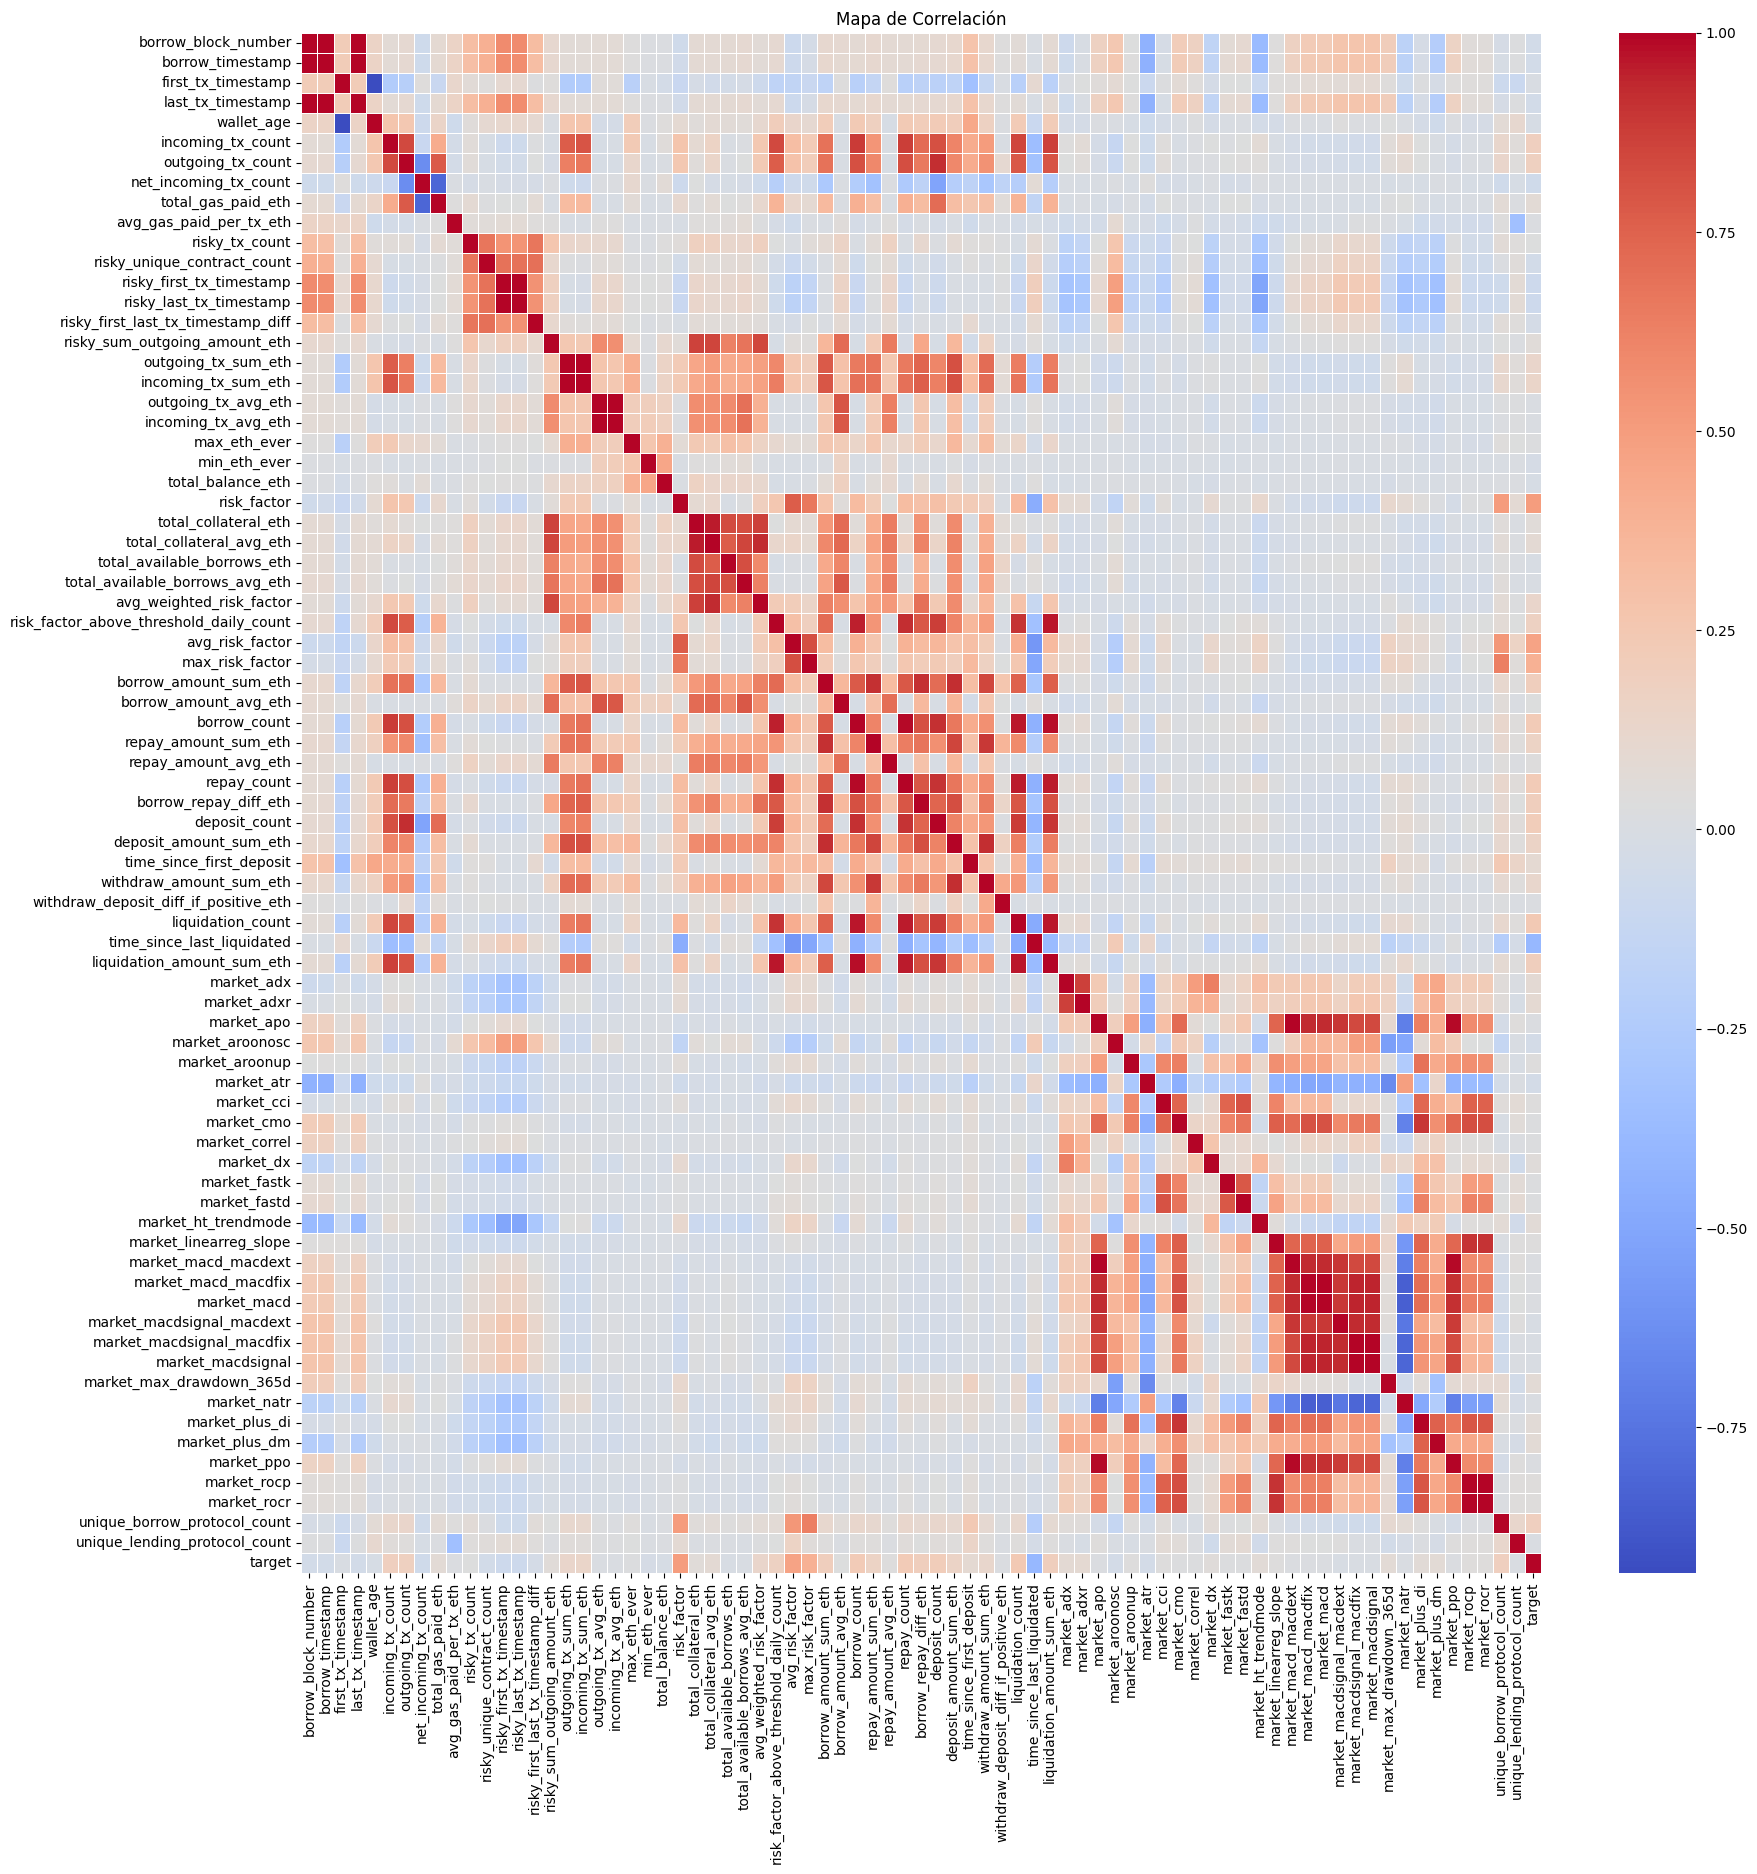

In [6]:
## Heatmap 
df= pd.concat([X0, y0], axis=1)
correlacion = df.select_dtypes(include=['float64', 'int64']).corr()


# Crear el heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlacion,annot=False, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlación")
plt.show()

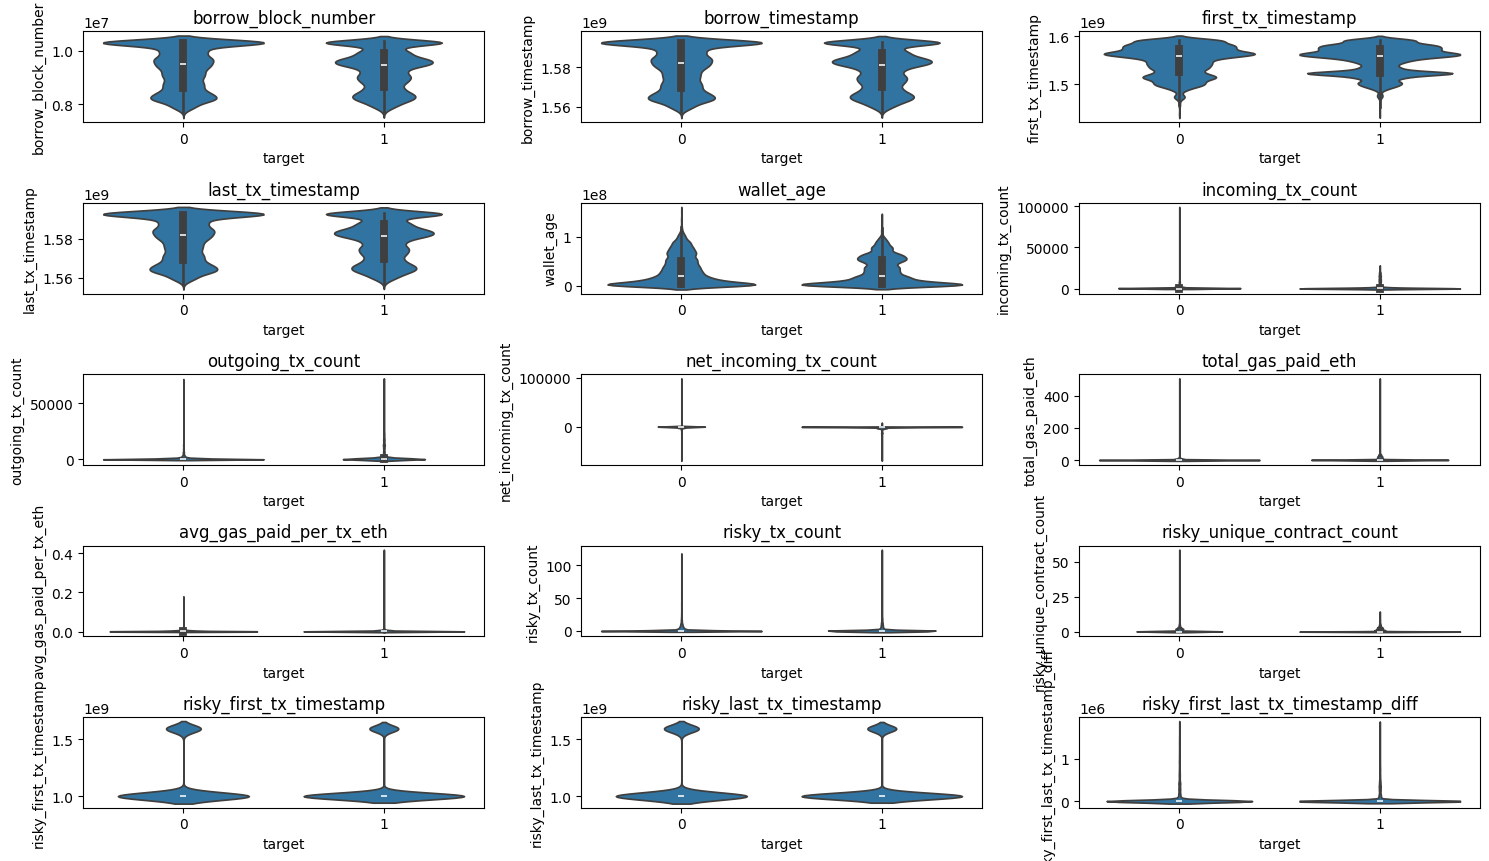

In [7]:
## Violinplots
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[:15]

# Crear un violinplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.violinplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

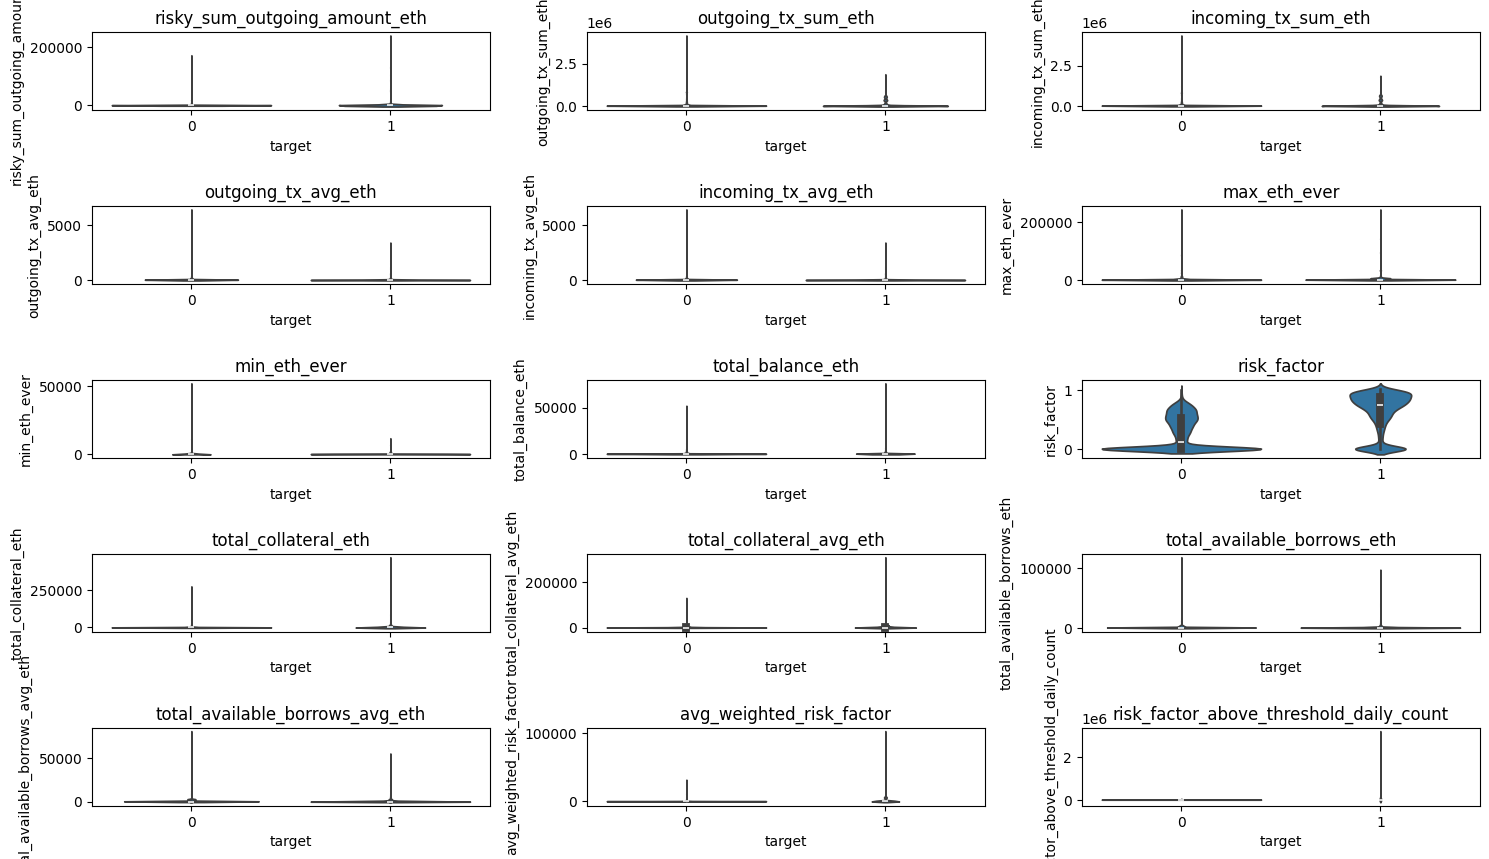

In [8]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[15:30]

# Establecer el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un violinplot para cada variable numérica según 'target'
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.violinplot(x='target', y=col, data=df)  # Crear un violin plot
    plt.title(f'{col}')
    plt.xlabel('target')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

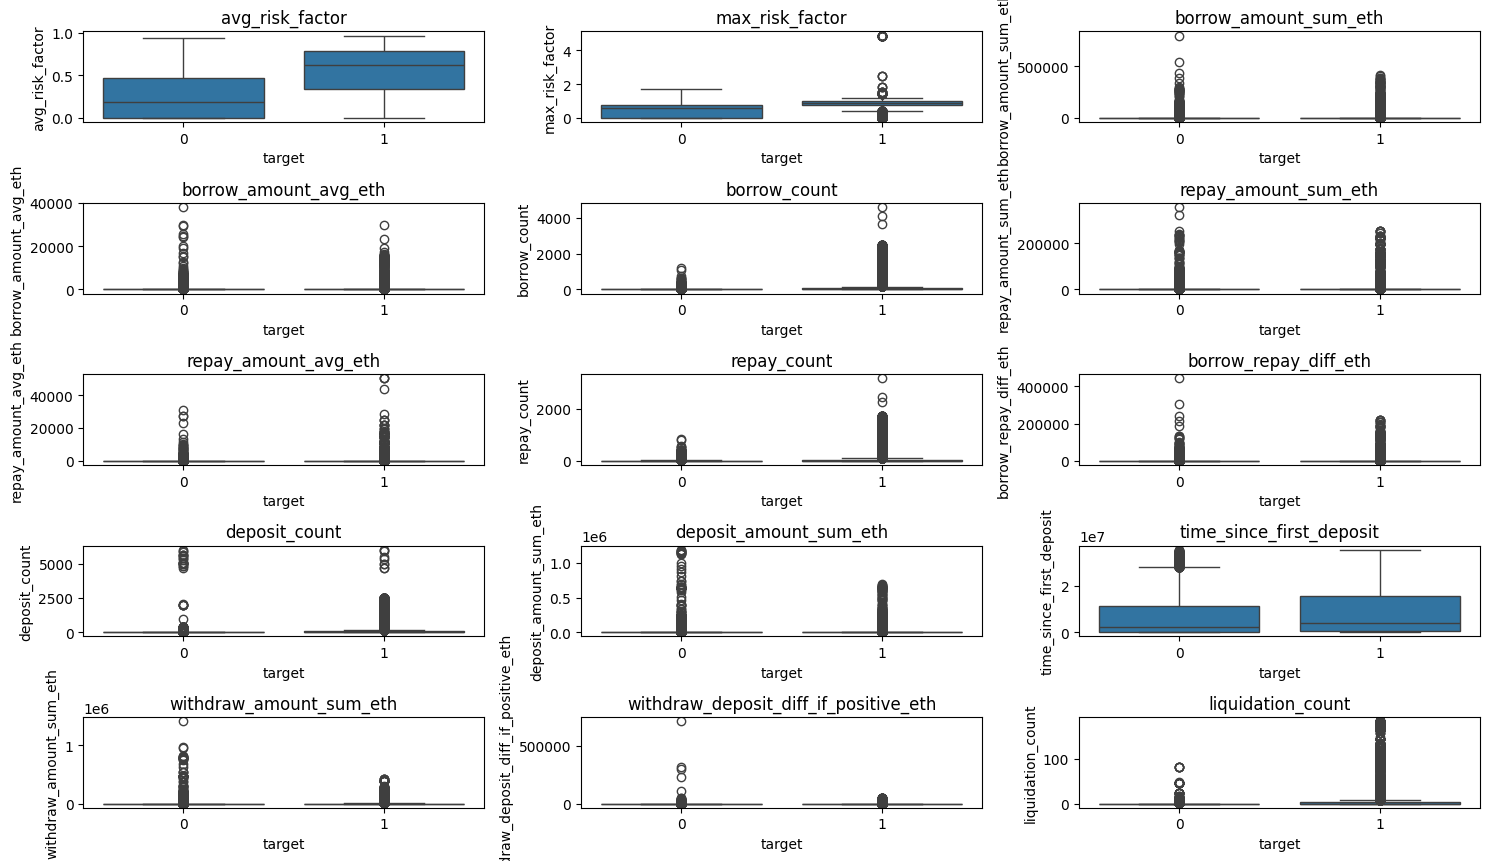

In [9]:
## Boxplots
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[30:45]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

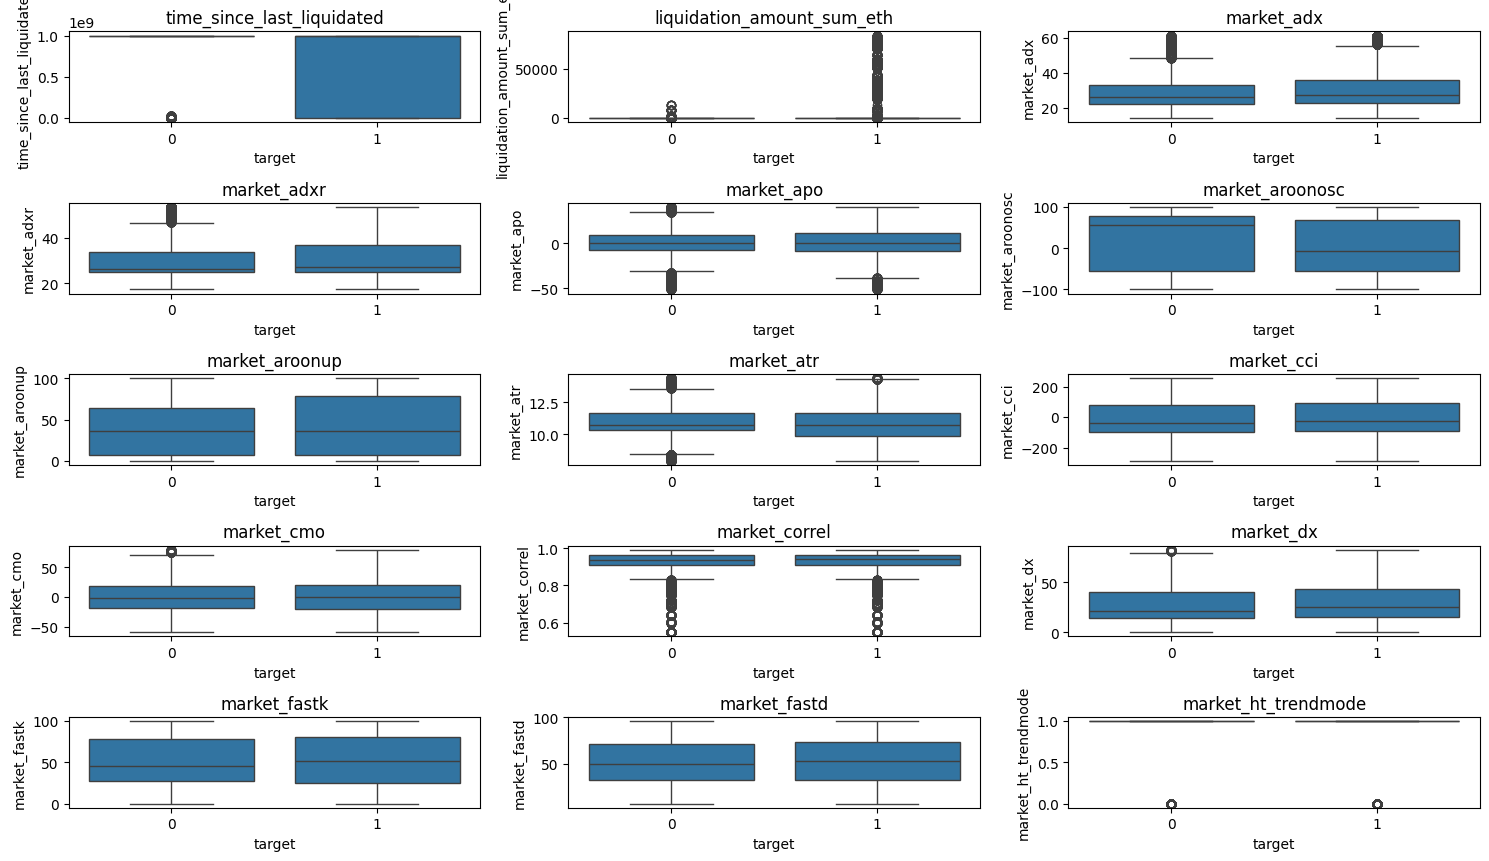

In [10]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[45:60]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

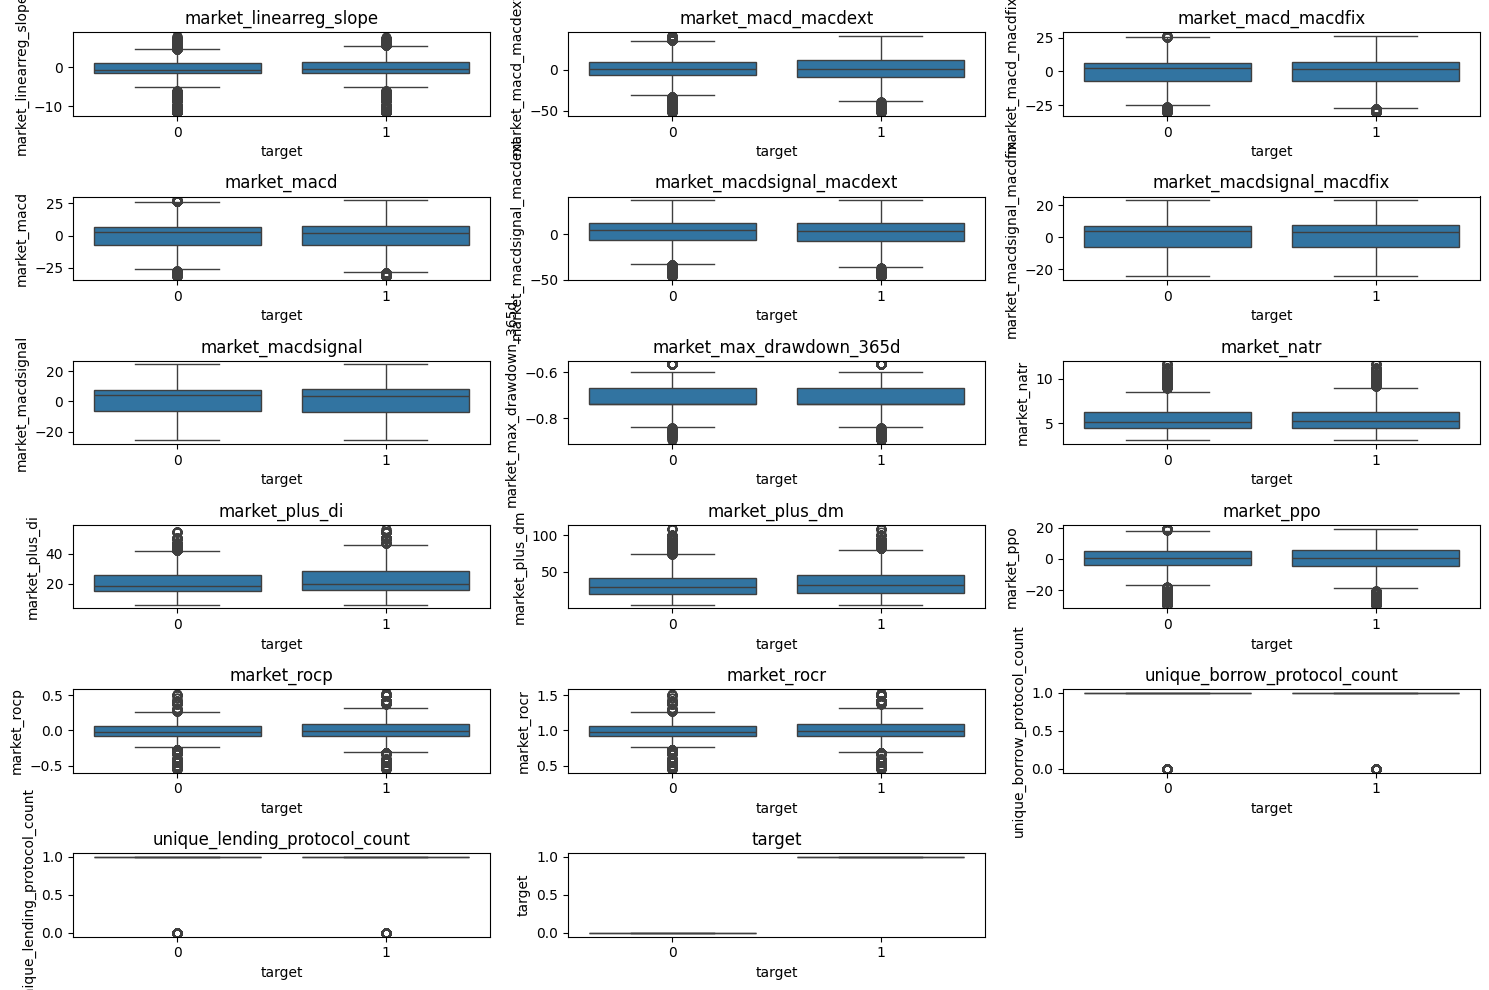

In [11]:
# Seleccionar las columnas numéricas del DataFrame original
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[60:]

# Crear un boxplot para cada variable numérica según 'target'
plt.figure(figsize=(15,10))  # Establecer el tamaño de la figura

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Ajustar el número de filas y columnas
    sns.boxplot(x='target', y=col, data=df)  # Usar df completo como data
    plt.title(f'{col}')
    plt.xlabel('target')

plt.tight_layout()  # Ajustar el espaciado
plt.show()

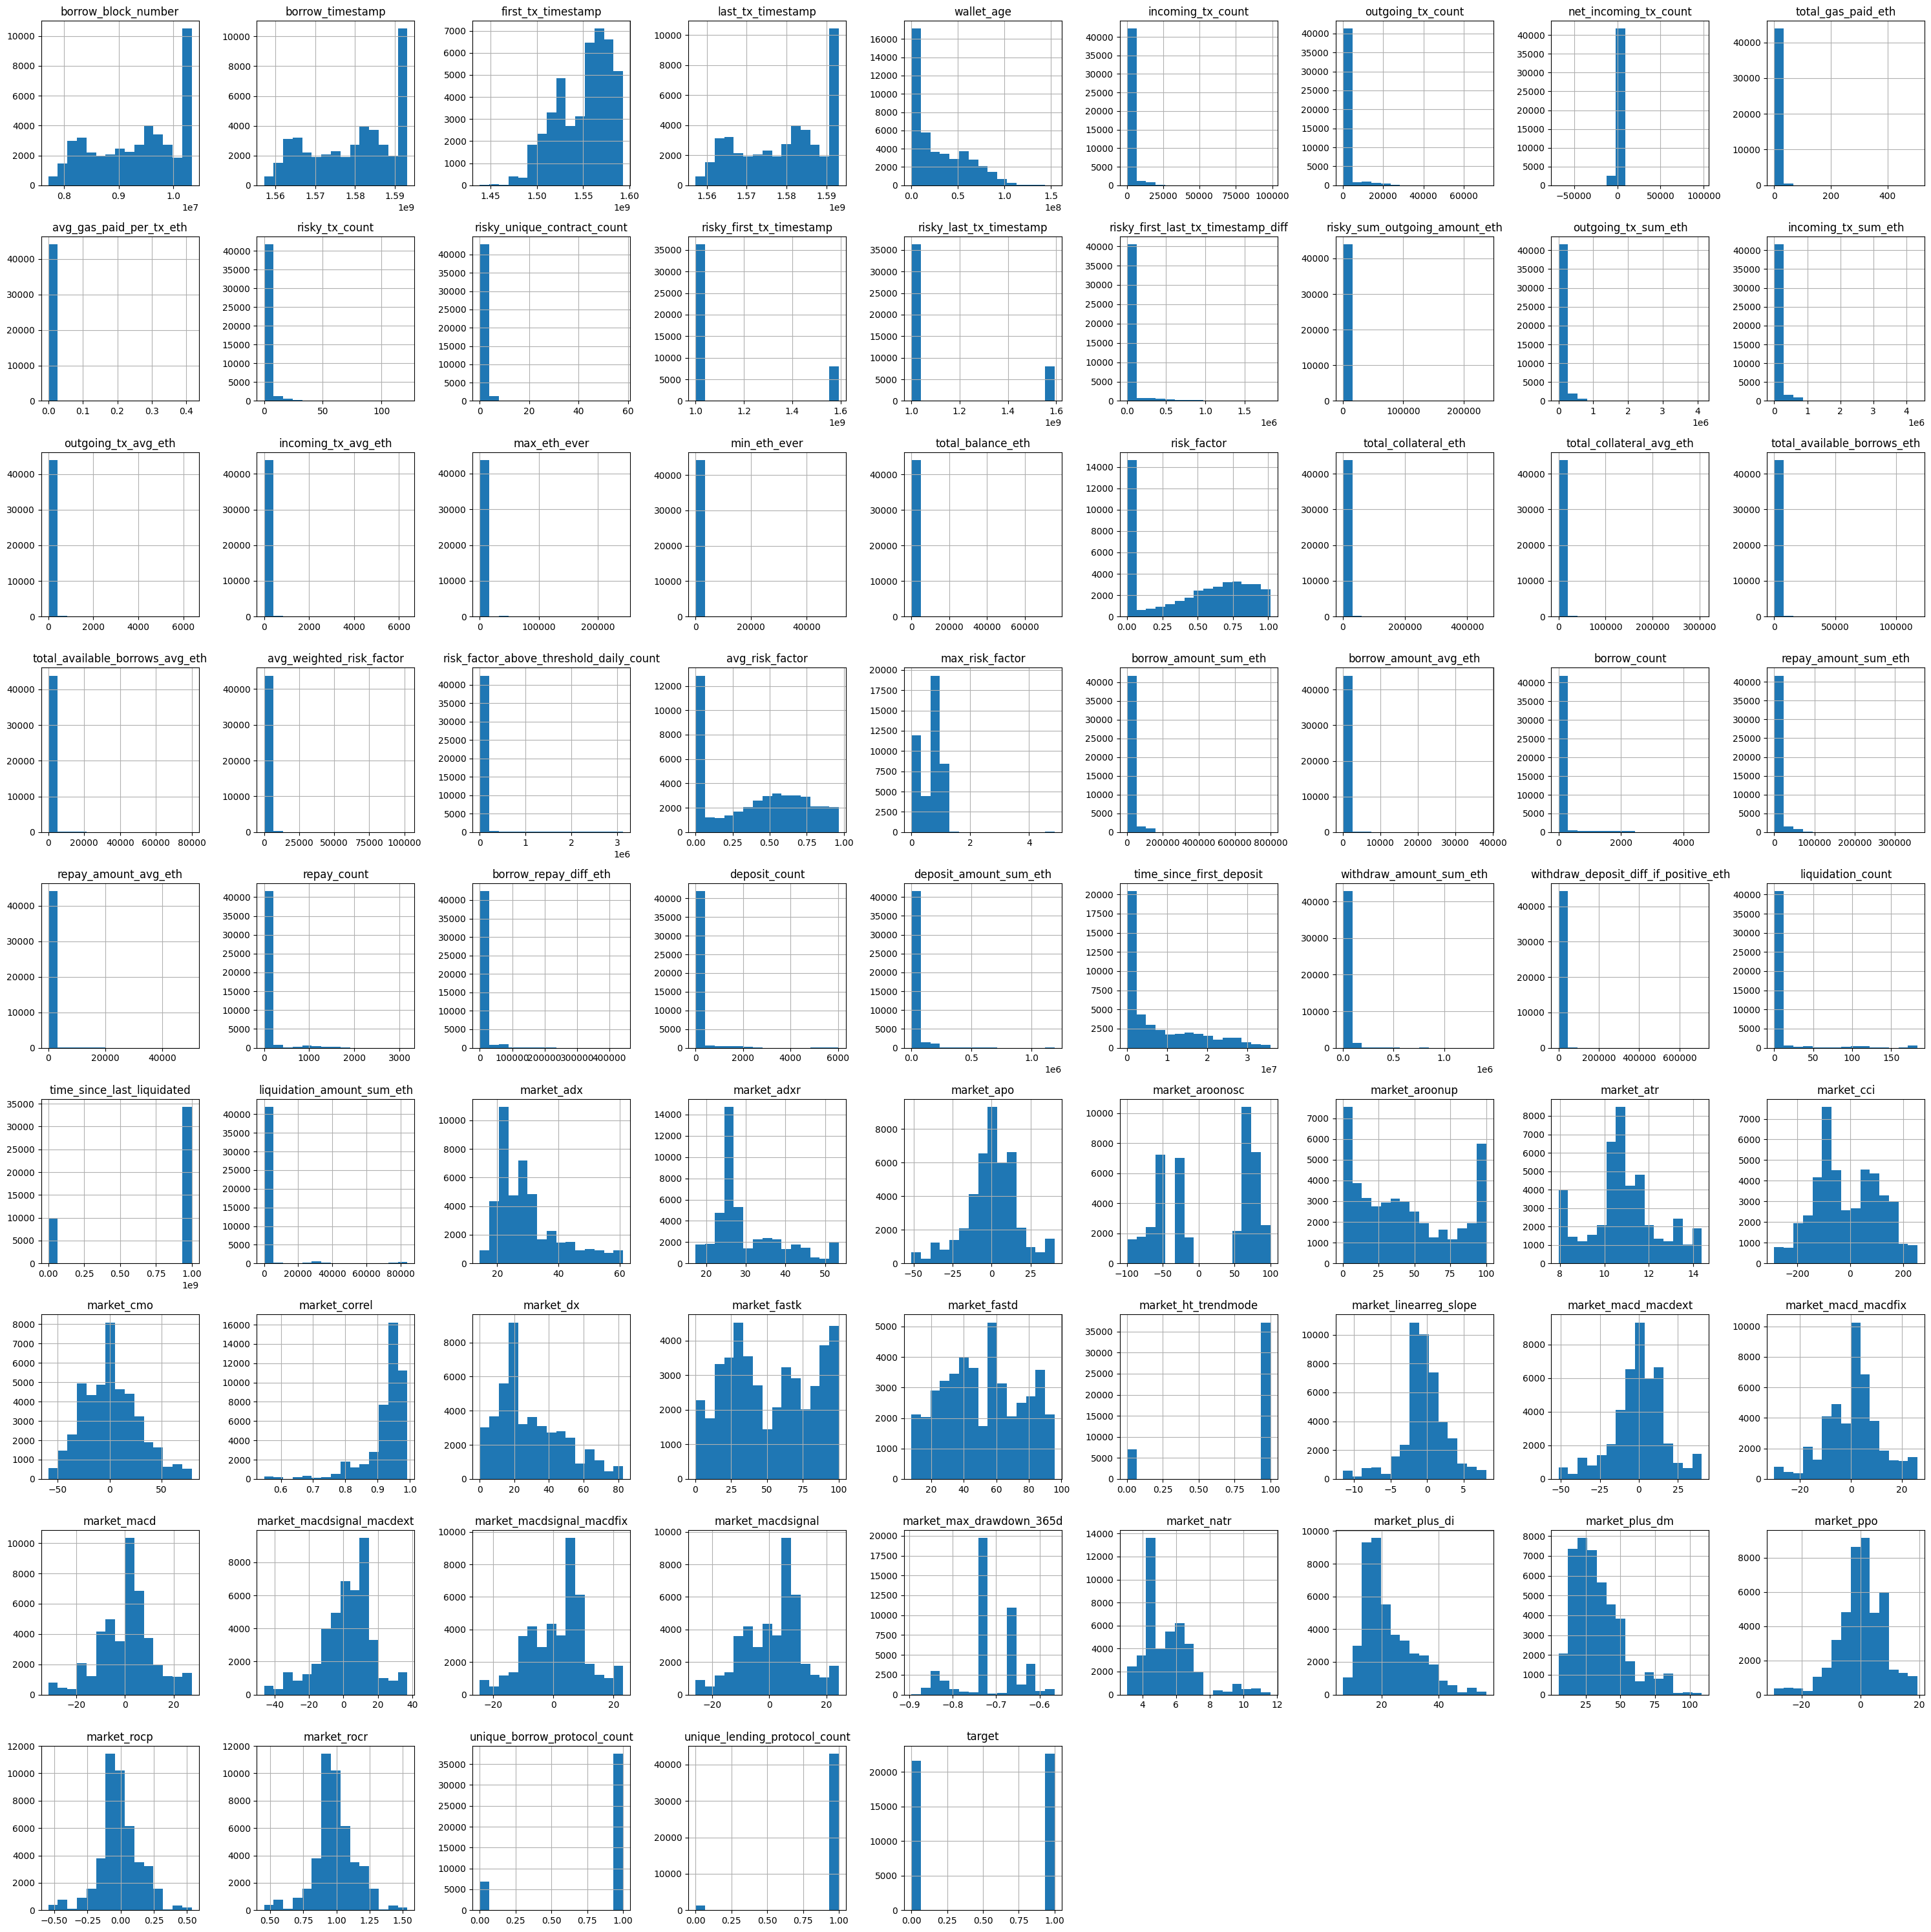

In [12]:
## Histogramas
df.hist(bins=15, figsize=(30, 30))
plt.tight_layout()
plt.show()

### Preprocesamiento de datos

In [20]:
ys = ['target']
binary_columns = ['market_ht_trendmode', 'unique_borrow_protocol_count', 'unique_lending_protocol_count']
id_columns = ['borrow_block_number']
wallet = ['wallet_address']
time_columns = [
    'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
    'time_since_first_deposit', 'time_since_last_liquidated'
]
timestamp_ms_columns = ['borrow_timestamp', 'first_tx_timestamp', 'last_tx_timestamp']

# Columnas a escalar
columns_to_scale = list(X0.columns.difference(id_columns + binary_columns + timestamp_ms_columns + time_columns + wallet))

# Configurar el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', id_columns + binary_columns + time_columns)
    ]
)

## Modelamiento

### División del conjunto de datos

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.3, stratify=y0,random_state=17)

### Creación de un modelo baseline

In [21]:
pipeline = Pipeline([
    ('Preprocessing', preprocessor),
    ('BaseLine', DummyClassifier(strategy='most_frequent'))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['avg_gas_paid_per_tx_eth',
                                                   'avg_risk_factor',
                                                   'avg_weighted_risk_factor',
                                                   'borrow_amount_avg_eth',
                                                   'borrow_amount_sum_eth',
                                                   'borrow_count',
                                                   'borrow_repay_diff_eth',
                                                   'deposit_amount_sum_eth',
                                                   'deposit_count',
                                                   'incoming_tx_avg_eth',
                                                   'incoming_tx_count',
                                                   'incoming_tx_sum...
                                                   'market_macd_macdfix', ...]),
                                                 ('passthrough', 'passthrough',
                                                  ['borrow_block_number',
                                                   'market_ht_trendmode',
                                                   'unique_borrow_protocol_count',
                                                   'unique_lending_protocol_count',
                                                   'risky_first_tx_timestamp',
                                                   'risky_last_tx_timestamp',
                                                   'risky_first_last_tx_timestamp_diff',
                                                   'time_since_first_deposit',
                                                   'time_since_last_liquidated'])])),
                ('BaseLine', DummyClassifier(strategy='most_frequent'))])

In [16]:
# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Generar el informe de clasificación
report = classification_report(y_test, y_pred)

# Mostrar el informe
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6492
           1       0.51      1.00      0.68      6797

    accuracy                           0.51     13289
   macro avg       0.26      0.50      0.34     13289
weighted avg       0.26      0.51      0.35     13289



c:\Users\geral\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geral\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geral\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Desarrollo de 3 modelos de Machine Learning

In [25]:
# Lista de modelos con sus nombres y hiperparámetros
models = [
    ('Extra Trees', ExtraTreesClassifier(n_estimators=200, max_depth=6, min_samples_split=4, random_state=17)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_split=4, random_state=17)),
    ('XGBoost', XGBClassifier(eval_metric='aucpr', n_estimators=200, max_depth=6, learning_rate=0.05, random_state=17))
]

# Iterar sobre los modelos
for name, model in models:
    print(f"Evaluating model: {name}")
    
    # Crear pipeline con preprocesamiento y modelo
    pipeline = Pipeline([
        ('Preprocessing', preprocessor),  # Ajusta según tu preprocesador
        (name, model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Predecir etiquetas y probabilidades
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Generar classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Calcular AUC-PR
    auc_pr = average_precision_score(y_test, y_prob)
    print(f"AUC-PR for {name}: {auc_pr:.4f}\n")
    


Evaluating model: Extra Trees


c:\Users\geral\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report for Extra Trees:

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      6492
           1       0.82      0.69      0.75      6797

    accuracy                           0.76     13289
   macro avg       0.77      0.76      0.76     13289
weighted avg       0.77      0.76      0.76     13289

AUC-PR for Extra Trees: 0.8607

Evaluating model: Random Forest


c:\Users\geral\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.74      0.88      0.81      6492
           1       0.86      0.71      0.78      6797

    accuracy                           0.79     13289
   macro avg       0.80      0.79      0.79     13289
weighted avg       0.80      0.79      0.79     13289

AUC-PR for Random Forest: 0.8988

Evaluating model: XGBoost

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6492
           1       0.90      0.78      0.84      6797

    accuracy                           0.85     13289
   macro avg       0.85      0.85      0.85     13289
weighted avg       0.85      0.85      0.85     13289

AUC-PR for XGBoost: 0.9375



Se puede observar que el mejor rendimiento se obtuvo con XGBoost, por lo que se ocupara este para las siguientes partes.

### Optimización de modelos

In [27]:

pipeline = Pipeline([
    ('Preprocessing', preprocessor),
    ('XGBoost', XGBClassifier())
])

pipeline.fit(X_train, y_train)

In [28]:
X0p = preprocessor.fit_transform(X0)
# Define tu función objetivo para maximizar aucpr
def objective_function(trial):
    # Define los hiperparámetros a optimizar
    params = {
        "objective": "binary:logistic",  # Para clasificación binaria
        "eval_metric": "aucpr",  # Métrica usada durante el entrenamiento
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
        "gamma": trial.suggest_float("gamma", 0, 1),
        "n_estimators": trial.suggest_int("n_estimators", 10, 300),
    }

    # Divide los datos en entrenamiento y validación
    X_train, X_test, y_train, y_test = train_test_split(X0p, y0, test_size=0.3, stratify=y0, random_state=17)

    # Entrena el modelo
    pruning_callback = XGBoostPruningCallback(trial, observation_key="validation_0-aucpr")  

    model = XGBClassifier(seed=17,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=10,
        callbacks=[pruning_callback], **params)

    # Entrenar el modelo
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )
    
    # Realiza predicciones de probabilidad
    y_prob = model.predict_proba(X_test)[:, 1]  # Tomamos la probabilidad de la clase positiva
    
    # Calcula AUC-PR
    aucpr = average_precision_score(y_test, y_prob)
    
    return aucpr

# Crear el estudio Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective_function, n_trials=200)

# Mostrar los mejores parámetros y AUC-PR alcanzado
print("Mejores parámetros:")
print(study.best_trial.params)

print(f"Mejor AUC-PR alcanzado: {study.best_trial.value}")

[I 2024-12-13 02:02:39,988] A new study created in memory with name: no-name-beb56410-267e-4bfe-83e5-d2cbc184aa30
C:\Users\geral\AppData\Local\Temp\ipykernel_14572\55702135.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
c:\Users\geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_set" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-13 02:02:43,241] Trial 0 finished with value: 0.8982259497637413 and parameters: {'max_depth': 6, 'learning_rate': 0.0013325515810599026, 'subsample': 0.8935452702388091, 'colsample_bytree': 0.9839485772924836, 'min_chil

Mejores parámetros:
{'max_depth': 8, 'learning_rate': 0.09993856109341626, 'subsample': 0.9989370049744636, 'colsample_bytree': 0.7139763424807369, 'min_child_weight': 2, 'gamma': 0.10380749484885254, 'n_estimators': 291}
Mejor AUC-PR alcanzado: 0.966218396904357


In [31]:
# Obtener los resultados del estudio de Optuna
trials_df = study.trials
trials_data = []

# Extraer los parámetros y el valor de AUC-PR de cada ensayo
for trial in trials_df:
    # Extraer los parámetros y el AUC-PR
    trial_params = trial.params
    trial_params['AUC-PR'] = trial.value  # Añadir el AUC-PR como una nueva columna
    trials_data.append(trial_params)

# Crear un DataFrame a partir de los resultados
trials_df_rf = pd.DataFrame(trials_data)

# Verificar las columnas del DataFrame
print("Columnas en el DataFrame:", trials_df_rf.columns)


# Crear el gráfico de coordenadas paralelas para Random Forest
fig = px.parallel_coordinates(
    trials_df_rf,
    dimensions=['max_depth', 'learning_rate', 'subsample', 'colsample_bytree',
       'min_child_weight', 'gamma', 'n_estimators', 'AUC-PR'],
    color='AUC-PR',  # Para colorear según el AUC-PR
    labels={
        'n_estimators': 'Número de Estimadores',
        'max_depth': 'Profundidad Máxima',
        'min_samples_split': 'Mínimo de Muestras para División',
        'min_samples_leaf': 'Mínimo de Muestras para Hoja',
        'max_features': 'Máximo de Características',
        'bootstrap': 'Bootstrap',
        'AUC-PR': 'Área bajo la Curva Precision-Recall'
    },
    color_continuous_scale='Blues',  # Cambiar el color del gráfico
    title="Paralel Coordinates: Parámetros y Rendimiento (Random Forest)"
)

# Mostrar el gráfico
fig.show()



Columnas en el DataFrame: Index(['max_depth', 'learning_rate', 'subsample', 'colsample_bytree',
       'min_child_weight', 'gamma', 'n_estimators', 'AUC-PR'],
      dtype='object')


In [39]:
def objective_function2(trial):
    # Define los hiperparámetros a optimizar
    params = {
        "objective": "binary:logistic",  # Para clasificación binaria
        "eval_metric": "aucpr",  # Métrica usada durante el entrenamiento
        "max_depth": trial.suggest_int("max_depth", 8, 13),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.02, 0.2),
        "subsample": trial.suggest_float("subsample", 0.7, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1),
        "min_child_weight": trial.suggest_int("min_child_weight", 0.5, 4),
        "gamma": trial.suggest_float("gamma", 0, 1),
        "n_estimators": trial.suggest_int("n_estimators", 50, 350),
    }

    # Divide los datos en entrenamiento y validación
    X_train, X_test, y_train, y_test = train_test_split(X0p, y0, test_size=0.3, stratify=y0, random_state=17)

    # Entrena el modelo
    pruning_callback = XGBoostPruningCallback(trial, observation_key="validation_0-aucpr")  

    model = XGBClassifier(seed=17,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=10,
        callbacks=[pruning_callback], **params)

    # Entrenar el modelo
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )
    
    # Realiza predicciones de probabilidad
    y_prob = model.predict_proba(X_test)[:, 1]  # Tomamos la probabilidad de la clase positiva
    
    # Calcula AUC-PR
    aucpr = average_precision_score(y_test, y_prob)
    
    return aucpr

# Crear el estudio Optuna
study2 = optuna.create_study(direction="maximize")
study2.optimize(objective_function2, n_trials=200)

# Mostrar los mejores parámetros y AUC-PR alcanzado
print("Mejores parámetros:")
print(study2.best_trial.params)

print(f"Mejor AUC-PR alcanzado: {study2.best_trial.value}")

[I 2024-12-13 02:21:46,468] A new study created in memory with name: no-name-6beb9f50-6918-4615-a37a-121d82f3e079


C:\Users\geral\AppData\Local\Temp\ipykernel_14572\1109442242.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

c:\Users\geral\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[02:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_set" } are not used.


[I 2024-12-13 02:21:57,631] Trial 0 finished with value: 0.9538226327681527 and parameters: {'max_depth': 8, 'learning_rate': 0.03822363492233656, 'subsample': 0.7749996908776283, 'colsample_bytree': 0.7438345393496882, 'min_child_weight': 0, 'gamma': 0.6110406527212948, 'n_estimators': 221}. Best is trial 0 with value: 0.9538226327681527.
C:\Users\geral\AppData\Local\Temp\ipykernel_14572\1109442242.py:7: FutureWarning:

suggest_loguniform has b

Mejores parámetros:
{'max_depth': 12, 'learning_rate': 0.1773179589639319, 'subsample': 0.9587200658024957, 'colsample_bytree': 0.8225629436346937, 'min_child_weight': 0, 'gamma': 0.002797615190007513, 'n_estimators': 314}
Mejor AUC-PR alcanzado: 0.9729468147553977


In [42]:
# Entrenar el modelo final con los mejores parámetros
best_params = study2.best_params
pipeline_final = Pipeline([
    ('Preprocessing', preprocessor),
    ('classifier', XGBClassifier(**best_params, random_state=17))
])

# Entrenamiento final
pipeline_final.fit(X_train, y_train)

# Guardar el modelo reentrenado
joblib.dump(pipeline_final, 'final_pipeline.pkl')

['final_pipeline.pkl']

- ¿Qué métricas decidieron optimizar?¿Por qué?
- ¿Cuanto tiempo le destinaron a esta etapa? ¿Existen indicios de que resultados puedan mejoraar destinando más tiempo?
- ¿Qué hiperparámetro tuvo un mayor impacto en el preformance de su modelo?

### Interpretabilidad del modelo con mejores resultados

In [45]:
clf = pipeline_final
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=17)
perm_sorted_idx = result.importances_mean.argsort()


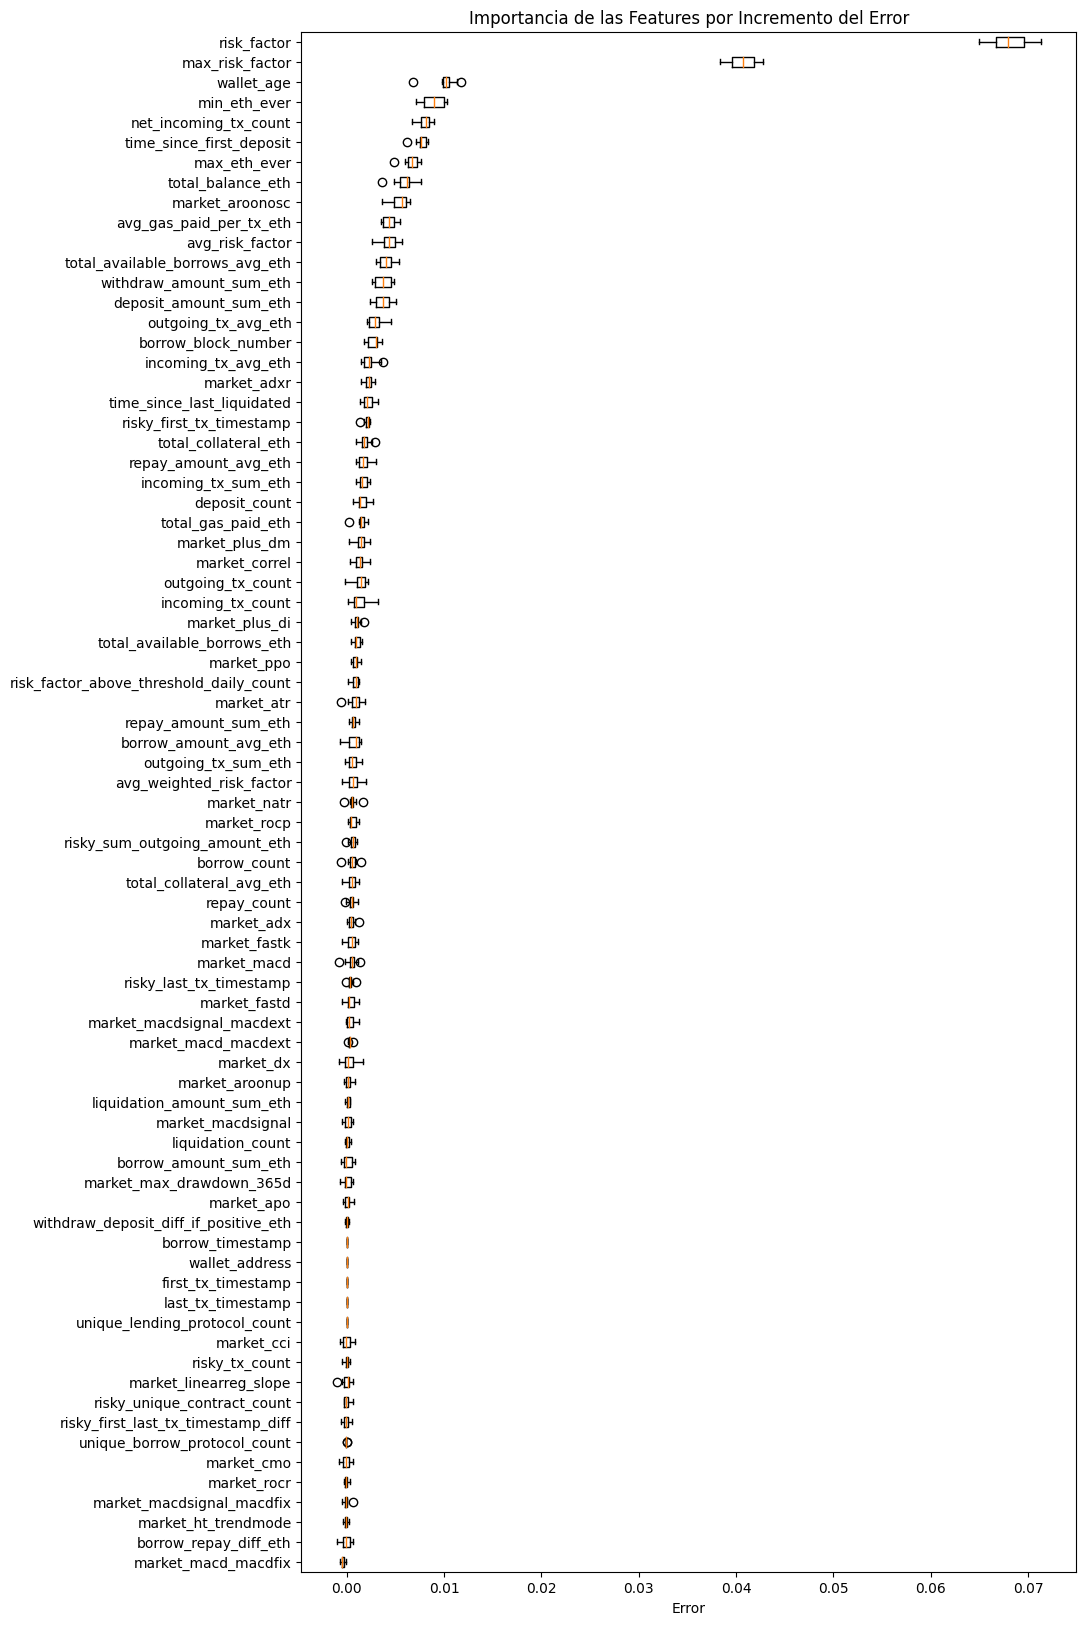

In [52]:
# Ajustar las dimensiones del gráfico
plt.figure(figsize=(10, 20))  # Ancho = 10 pulgadas, Alto = 6 pulgadas

# Crear el boxplot
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)

# Personalizar el gráfico
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')

# Mostrar el gráfico
plt.show()


In [53]:
preds = clf.predict(X_test)
predict_fn = lambda x: clf.predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=17) # instanciamos Anchor usando función creada
explainer.fit(X_train.to_numpy()) # sobre los datos

idx = 5 # índice obs a predecir
obs = np.array(X_test.iloc[idx], ndmin = 2) # array de la obs

explanation = explainer.explain(obs, threshold=0.95) # generar anchor
print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

PredictorCallError: Predictor failed to be called on <class 'numpy.ndarray'> of shape (1, 77) and dtype float32. Check that the parameter `feature_names` is correctly specified.

- ¿Podría explicar el funcionamiento de su modelo para una predicción en particular? Si es así, explique 3 ejemplos.
- ¿Qué atributo tiene una mayor importancia en la salida de su modelo? ¿Tiene esto sentido con el problema de negocio?
- ¿Existe alguna interacción entre atributos que sea relevante para el modelo?
- ¿Podría existir sesgo hacia algún atributo en particular? ¿Cuál?

## MLOps

### Tracking con MLFlow

### Desarrollo de Aplicación Web

In [ ]:
# cargar modelo
with open('final_pipeline.pkl', 'rb') as file:
    model = pickle.load(file)

labels_dict = {0: 'No moroso', 1: 'Moroso'} # label dict
def make_prediction(borrow_block_number: int, borrow_timestamp: float, wallet_address: object, first_tx_timestamp: float, last_tx_timestamp: float, wallet_age: float, 
                    incoming_tx_count: int, outgoing_tx_count: int, net_incoming_tx_count: int, total_gas_paid_eth: float, avg_gas_paid_per_tx_eth: float, 
                    risky_tx_count: int, risky_unique_contract_count: int, risky_first_tx_timestamp: int, risky_last_tx_timestamp: int, 
                    risky_first_last_tx_timestamp_diff: int, risky_sum_outgoing_amount_eth: float, outgoing_tx_sum_eth: float, incoming_tx_sum_eth: float, 
                    outgoing_tx_avg_eth: float, incoming_tx_avg_eth: float, max_eth_ever: float, min_eth_ever: float, total_balance_eth: float, risk_factor: float, 
                    total_collateral_eth: float, total_collateral_avg_eth: float, total_available_borrows_eth: float, total_available_borrows_avg_eth: float, 
                    avg_weighted_risk_factor: float, risk_factor_above_threshold_daily_count: float, avg_risk_factor: float, max_risk_factor: float, 
                    borrow_amount_sum_eth: float, borrow_amount_avg_eth: float, borrow_count: int, repay_amount_sum_eth: float, repay_amount_avg_eth: float, 
                    repay_count: int, borrow_repay_diff_eth: float, deposit_count: int, deposit_amount_sum_eth: float, time_since_first_deposit: float, 
                    withdraw_amount_sum_eth: float, withdraw_deposit_diff_if_positive_eth: float, liquidation_count: int, time_since_last_liquidated: float, 
                    liquidation_amount_sum_eth: float, market_adx: float, market_adxr: float, market_apo: float, market_aroonosc: float, market_aroonup: float, 
                    market_atr: float, market_cci: float, market_cmo: float, market_correl: float, market_dx: float, market_fastk: float, market_fastd: float, 
                    market_ht_trendmode: int, market_linearreg_slope: float, market_macd_macdext: float, market_macd_macdfix: float, market_macd: float, 
                    market_macdsignal_macdext: float, market_macdsignal_macdfix: float, market_macdsignal: float, market_max_drawdown_365d: float, market_natr: float, 
                    market_plus_di: float, market_plus_dm: float, market_ppo: float, market_rocp: float, market_rocr: float, unique_borrow_protocol_count: int, 
                    unique_lending_protocol_count: int):
    '''
    función que devuelve la predicción del modelo dado un set de atributos
    '''

    # mantener el orden!
    features = [
        [borrow_block_number, borrow_timestamp, wallet_address, first_tx_timestamp, 
        last_tx_timestamp, wallet_age, incoming_tx_count, outgoing_tx_count, 
        net_incoming_tx_count, total_gas_paid_eth, avg_gas_paid_per_tx_eth, 
        risky_tx_count, risky_unique_contract_count, risky_first_tx_timestamp, 
        risky_last_tx_timestamp, risky_first_last_tx_timestamp_diff, 
        risky_sum_outgoing_amount_eth, outgoing_tx_sum_eth, incoming_tx_sum_eth, 
        outgoing_tx_avg_eth, incoming_tx_avg_eth, max_eth_ever, min_eth_ever, 
        total_balance_eth, risk_factor, total_collateral_eth, 
        total_collateral_avg_eth, total_available_borrows_eth, 
        total_available_borrows_avg_eth, avg_weighted_risk_factor, 
        risk_factor_above_threshold_daily_count, avg_risk_factor, max_risk_factor, 
        borrow_amount_sum_eth, borrow_amount_avg_eth, borrow_count, 
        repay_amount_sum_eth, repay_amount_avg_eth, repay_count, 
        borrow_repay_diff_eth, deposit_count, deposit_amount_sum_eth, 
        time_since_first_deposit, withdraw_amount_sum_eth, 
        withdraw_deposit_diff_if_positive_eth, liquidation_count, 
        time_since_last_liquidated, liquidation_amount_sum_eth, market_adx, 
        market_adxr, market_apo, market_aroonosc, market_aroonup, market_atr, 
        market_cci, market_cmo, market_correl, market_dx, market_fastk, 
        market_fastd, market_ht_trendmode, market_linearreg_slope, 
        market_macd_macdext, market_macd_macdfix, market_macd, 
        market_macdsignal_macdext, market_macdsignal_macdfix, market_macdsignal, 
        market_max_drawdown_365d, market_natr, market_plus_di, market_plus_dm, 
        market_ppo, market_rocp, market_rocr, unique_borrow_protocol_count, 
        unique_lending_protocol_count]  # obs to predict
    ]

    
    prediction = model.predict(features).item() # hacer prediccion
    label = labels_dict[prediction] # transformar a etiquetas

    return label # returnar prediccion

In [ ]:
app = FastAPI()

# Endpoint para predecir desde CSV
@app.post("/predict_csv/")
async def predict_csv(file: UploadFile):
    df = pd.read_csv(file.file)  # Leer CSV
    # Asegurar que las columnas tengan los nombres esperados
    required_columns = ['borrow_block_number', 'borrow_timestamp', 'wallet_address', 'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age', 'incoming_tx_count', 
                        'outgoing_tx_count', 'net_incoming_tx_count', 'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count', 'risky_unique_contract_count', 
                        'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff', 'risky_sum_outgoing_amount_eth', 
                        'outgoing_tx_sum_eth', 'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth', 'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 
                        'risk_factor', 'total_collateral_eth', 'total_collateral_avg_eth', 'total_available_borrows_eth', 'total_available_borrows_avg_eth', 
                        'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count', 'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth', 
                        'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth', 'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth', 
                        'deposit_count', 'deposit_amount_sum_eth', 'time_since_first_deposit', 'withdraw_amount_sum_eth', 'withdraw_deposit_diff_if_positive_eth', 
                        'liquidation_count', 'time_since_last_liquidated', 'liquidation_amount_sum_eth', 'market_adx','market_adxr', 'market_apo', 'market_aroonosc', 
                        'market_aroonup', 'market_atr', 'market_cci', 'market_cmo', 'market_correl', 'market_dx', 'market_fastk', 'market_fastd', 'market_ht_trendmode', 
                        'market_linearreg_slope', 'market_macd_macdext', 'market_macd_macdfix', 'market_macd', 'market_macdsignal_macdext', 'market_macdsignal_macdfix', 
                        'market_macdsignal', 'market_max_drawdown_365d', 'market_natr', 'market_plus_di', 'market_plus_dm', 'market_ppo', 'market_rocp', 'market_rocr', 
                        'unique_borrow_protocol_count', 'unique_lending_protocol_count']

    if not all(col in df.columns for col in required_columns):
        return JSONResponse({"error": "El archivo no contiene las columnas necesarias"})

    # Generar predicciones
    df['Prediction'] = df.apply(
    lambda row: make_prediction(row['borrow_block_number'], row['borrow_timestamp'], row['wallet_address'], row['first_tx_timestamp'], row['last_tx_timestamp'], 
                                row['wallet_age'], row['incoming_tx_count'], row['outgoing_tx_count'], row['net_incoming_tx_count'], row['total_gas_paid_eth'],
                                row['avg_gas_paid_per_tx_eth'], row['risky_tx_count'], row['risky_unique_contract_count'], row['risky_first_tx_timestamp'],
                                row['risky_last_tx_timestamp'], row['risky_first_last_tx_timestamp_diff'], row['risky_sum_outgoing_amount_eth'],
                                row['outgoing_tx_sum_eth'], row['incoming_tx_sum_eth'], row['outgoing_tx_avg_eth'], row['incoming_tx_avg_eth'], row['max_eth_ever'],
                                row['min_eth_ever'], row['total_balance_eth'], row['risk_factor'], row['total_collateral_eth'], row['total_collateral_avg_eth'], 
                                row['total_available_borrows_eth'], row['total_available_borrows_avg_eth'], row['avg_weighted_risk_factor'], 
                                row['risk_factor_above_threshold_daily_count'], row['avg_risk_factor'], row['max_risk_factor'], row['borrow_amount_sum_eth'], 
                                row['borrow_amount_avg_eth'], row['borrow_count'], row['repay_amount_sum_eth'], row['repay_amount_avg_eth'], row['repay_count'],
                                row['borrow_repay_diff_eth'], row['deposit_count'], row['deposit_amount_sum_eth'], row['time_since_first_deposit'], 
                                row['withdraw_amount_sum_eth'], row['withdraw_deposit_diff_if_positive_eth'], row['liquidation_count'], row['time_since_last_liquidated'], 
                                row['liquidation_amount_sum_eth'], row['market_adx'], row['market_adxr'], row['market_apo'], row['market_aroonosc'], row['market_aroonup'], 
                                row['market_atr'], row['market_cci'], row['market_cmo'], row['market_correl'], row['market_dx'], row['market_fastk'], row['market_fastd'], 
                                row['market_ht_trendmode'], row['market_linearreg_slope'], row['market_macd_macdext'], row['market_macd_macdfix'], row['market_macd'], 
                                row['market_macdsignal_macdext'], row['market_macdsignal_macdfix'], row['market_macdsignal'], row['market_max_drawdown_365d'], 
                                row['market_natr'], row['market_plus_di'], row['market_plus_dm'], row['market_ppo'], row['market_rocp'], row['market_rocr'], 
                                row['unique_borrow_protocol_count'], row['unique_lending_protocol_count']), axis=1)


    output_file = "predictions.csv"
    df.to_csv(output_file, index=False)
    return FileResponse(output_file, media_type="text/csv", filename="predictions.csv")

# Endpoint para predecir manualmente
@app.post("/predict_manual/")

async def predict_manual(
    borrow_block_number: int = Form(...),
    borrow_timestamp: float = Form(...),
    wallet_address: str = Form(...),
    first_tx_timestamp: float = Form(...),
    last_tx_timestamp: float = Form(...),
    wallet_age: float = Form(...),
    incoming_tx_count: int = Form(...),
    outgoing_tx_count: int = Form(...),
    net_incoming_tx_count: int = Form(...),
    total_gas_paid_eth: float = Form(...),
    avg_gas_paid_per_tx_eth: float = Form(...),
    risky_tx_count: int = Form(...),
    risky_unique_contract_count: int = Form(...),
    risky_first_tx_timestamp: int = Form(...),
    risky_last_tx_timestamp: int = Form(...),
    risky_first_last_tx_timestamp_diff: int = Form(...),
    risky_sum_outgoing_amount_eth: float = Form(...),
    outgoing_tx_sum_eth: float = Form(...),
    incoming_tx_sum_eth: float = Form(...),
    outgoing_tx_avg_eth: float = Form(...),
    incoming_tx_avg_eth: float = Form(...),
    max_eth_ever: float = Form(...),
    min_eth_ever: float = Form(...),
    total_balance_eth: float = Form(...),
    risk_factor: float = Form(...),
    total_collateral_eth: float = Form(...),
    total_collateral_avg_eth: float = Form(...),
    total_available_borrows_eth: float = Form(...),
    total_available_borrows_avg_eth: float = Form(...),
    avg_weighted_risk_factor: float = Form(...),
    risk_factor_above_threshold_daily_count: float = Form(...),
    avg_risk_factor: float = Form(...),
    max_risk_factor: float = Form(...),
    borrow_amount_sum_eth: float = Form(...),
    borrow_amount_avg_eth: float = Form(...),
    borrow_count: int = Form(...),
    repay_amount_sum_eth: float = Form(...),
    repay_amount_avg_eth: float = Form(...),
    repay_count: int = Form(...),
    borrow_repay_diff_eth: float = Form(...),
    deposit_count: int = Form(...),
    deposit_amount_sum_eth: float = Form(...),
    time_since_first_deposit: float = Form(...),
    withdraw_amount_sum_eth: float = Form(...),
    withdraw_deposit_diff_if_positive_eth: float = Form(...),
    liquidation_count: int = Form(...),
    time_since_last_liquidated: float = Form(...),
    liquidation_amount_sum_eth: float = Form(...),
    market_adx: float = Form(...),
    market_adxr: float = Form(...),
    market_apo: float = Form(...),
    market_aroonosc: float = Form(...),
    market_aroonup: float = Form(...),
    market_atr: float = Form(...),
    market_cci: float = Form(...),
    market_cmo: float = Form(...),
    market_correl: float = Form(...),
    market_dx: float = Form(...),
    market_fastk: float = Form(...),
    market_fastd: float = Form(...),
    market_ht_trendmode: int = Form(...),
    market_linearreg_slope: float = Form(...),
    market_macd_macdext: float = Form(...),
    market_macd_macdfix: float = Form(...),
    market_macd: float = Form(...),
    market_macdsignal_macdext: float = Form(...),
    market_macdsignal_macdfix: float = Form(...),
    market_macdsignal: float = Form(...),
    market_max_drawdown_365d: float = Form(...),
    market_natr: float = Form(...),
    market_plus_di: float = Form(...),
    market_plus_dm: float = Form(...),
    market_ppo: float = Form(...),
    market_rocp: float = Form(...),
    market_rocr: float = Form(...),
    unique_borrow_protocol_count: int = Form(...),
    unique_lending_protocol_count: int = Form(...)
    ):
    # Usar make_prediction para generar la predicción
    prediction = make_prediction(borrow_block_number, borrow_timestamp, wallet_address, first_tx_timestamp, last_tx_timestamp, wallet_age, incoming_tx_count, 
                                 outgoing_tx_count, net_incoming_tx_count, total_gas_paid_eth, avg_gas_paid_per_tx_eth, risky_tx_count, risky_unique_contract_count,
                                 risky_first_tx_timestamp, risky_last_tx_timestamp, risky_first_last_tx_timestamp_diff, risky_sum_outgoing_amount_eth,
                                 outgoing_tx_sum_eth, incoming_tx_sum_eth, outgoing_tx_avg_eth, incoming_tx_avg_eth, max_eth_ever, min_eth_ever, total_balance_eth,
                                 risk_factor, total_collateral_eth, total_collateral_avg_eth, total_available_borrows_eth, total_available_borrows_avg_eth,
                                 avg_weighted_risk_factor, risk_factor_above_threshold_daily_count, avg_risk_factor, max_risk_factor, borrow_amount_sum_eth,
                                 borrow_amount_avg_eth, borrow_count, repay_amount_sum_eth, repay_amount_avg_eth, repay_count, borrow_repay_diff_eth,
                                 deposit_count, deposit_amount_sum_eth, time_since_first_deposit, withdraw_amount_sum_eth, withdraw_deposit_diff_if_positive_eth,
                                 liquidation_count, time_since_last_liquidated, liquidation_amount_sum_eth, market_adx, market_adxr, market_apo, market_aroonosc,
                                 market_aroonup, market_atr, market_cci, market_cmo, market_correl, market_dx, market_fastk, market_fastd, market_ht_trendmode,
                                 market_linearreg_slope, market_macd_macdext, market_macd_macdfix, market_macd, market_macdsignal_macdext, market_macdsignal_macdfix,
                                 market_macdsignal, market_max_drawdown_365d, market_natr, market_plus_di, market_plus_dm, market_ppo, market_rocp, market_rocr,
                                 unique_borrow_protocol_count, unique_lending_protocol_count)

    return JSONResponse({"prediction": prediction})

In [ ]:
# Función para enviar CSV
def predict_csv(file):
    response = requests.post(
        "http://fastapi:8000/predict_csv/", 
        files={"file": file}
    )
    with open("output.csv", "wb") as f:
        f.write(response.content)
    return "output.csv"

# Función para enviar datos manuales
def predict_manual(borrow_block_number, borrow_timestamp, wallet_address, first_tx_timestamp, last_tx_timestamp, 
                   wallet_age, incoming_tx_count, outgoing_tx_count, net_incoming_tx_count, total_gas_paid_eth,
                   avg_gas_paid_per_tx_eth, risky_tx_count, risky_unique_contract_count, risky_first_tx_timestamp, 
                   risky_last_tx_timestamp, risky_first_last_tx_timestamp_diff, risky_sum_outgoing_amount_eth,
                   outgoing_tx_sum_eth, incoming_tx_sum_eth, outgoing_tx_avg_eth, incoming_tx_avg_eth, max_eth_ever,
                   min_eth_ever, total_balance_eth, risk_factor, total_collateral_eth, total_collateral_avg_eth, 
                   total_available_borrows_eth, total_available_borrows_avg_eth, avg_weighted_risk_factor, 
                   risk_factor_above_threshold_daily_count, avg_risk_factor, max_risk_factor, borrow_amount_sum_eth, 
                   borrow_amount_avg_eth, borrow_count, repay_amount_sum_eth, repay_amount_avg_eth, repay_count, 
                   borrow_repay_diff_eth, deposit_count, deposit_amount_sum_eth, time_since_first_deposit, 
                   withdraw_amount_sum_eth, withdraw_deposit_diff_if_positive_eth, liquidation_count, 
                   time_since_last_liquidated, liquidation_amount_sum_eth, market_adx, market_adxr, market_apo, 
                   market_aroonosc, market_aroonup, market_atr, market_cci, market_cmo, market_correl, market_dx, 
                   market_fastk, market_fastd, market_ht_trendmode, market_linearreg_slope, market_macd_macdext, 
                   market_macd_macdfix, market_macd, market_macdsignal_macdext, market_macdsignal_macdfix, 
                   market_macdsignal, market_max_drawdown_365d, market_natr, market_plus_di, market_plus_dm, 
                   market_ppo, market_rocp, market_rocr, unique_borrow_protocol_count, unique_lending_protocol_count):

    # Realiza la solicitud POST al servidor FastAPI
    response = requests.post(
        "http://fastapi:8000/predict_manual/",
        data={
            "borrow_block_number": borrow_block_number,
            "borrow_timestamp": borrow_timestamp,
            "wallet_address": wallet_address,
            "first_tx_timestamp": first_tx_timestamp,
            "last_tx_timestamp": last_tx_timestamp,
            "wallet_age": wallet_age,
            "incoming_tx_count": incoming_tx_count,
            "outgoing_tx_count": outgoing_tx_count,
            "net_incoming_tx_count": net_incoming_tx_count,
            "total_gas_paid_eth": total_gas_paid_eth,
            "avg_gas_paid_per_tx_eth": avg_gas_paid_per_tx_eth,
            "risky_tx_count": risky_tx_count,
            "risky_unique_contract_count": risky_unique_contract_count,
            "risky_first_tx_timestamp": risky_first_tx_timestamp,
            "risky_last_tx_timestamp": risky_last_tx_timestamp,
            "risky_first_last_tx_timestamp_diff": risky_first_last_tx_timestamp_diff,
            "risky_sum_outgoing_amount_eth": risky_sum_outgoing_amount_eth,
            "outgoing_tx_sum_eth": outgoing_tx_sum_eth,
            "incoming_tx_sum_eth": incoming_tx_sum_eth,
            "outgoing_tx_avg_eth": outgoing_tx_avg_eth,
            "incoming_tx_avg_eth": incoming_tx_avg_eth,
            "max_eth_ever": max_eth_ever,
            "min_eth_ever": min_eth_ever,
            "total_balance_eth": total_balance_eth,
            "risk_factor": risk_factor,
            "total_collateral_eth": total_collateral_eth,
            "total_collateral_avg_eth": total_collateral_avg_eth,
            "total_available_borrows_eth": total_available_borrows_eth,
            "total_available_borrows_avg_eth": total_available_borrows_avg_eth,
            "avg_weighted_risk_factor": avg_weighted_risk_factor,
            "risk_factor_above_threshold_daily_count": risk_factor_above_threshold_daily_count,
            "avg_risk_factor": avg_risk_factor,
            "max_risk_factor": max_risk_factor,
            "borrow_amount_sum_eth": borrow_amount_sum_eth,
            "borrow_amount_avg_eth": borrow_amount_avg_eth,
            "borrow_count": borrow_count,
            "repay_amount_sum_eth": repay_amount_sum_eth,
            "repay_amount_avg_eth": repay_amount_avg_eth,
            "repay_count": repay_count,
            "borrow_repay_diff_eth": borrow_repay_diff_eth,
            "deposit_count": deposit_count,
            "deposit_amount_sum_eth": deposit_amount_sum_eth,
            "time_since_first_deposit": time_since_first_deposit,
            "withdraw_amount_sum_eth": withdraw_amount_sum_eth,
            "withdraw_deposit_diff_if_positive_eth": withdraw_deposit_diff_if_positive_eth,
            "liquidation_count": liquidation_count,
            "time_since_last_liquidated": time_since_last_liquidated,
            "liquidation_amount_sum_eth": liquidation_amount_sum_eth,
            "market_adx": market_adx,
            "market_adxr": market_adxr,
            "market_apo": market_apo,
            "market_aroonosc": market_aroonosc,
            "market_aroonup": market_aroonup,
            "market_atr": market_atr,
            "market_cci": market_cci,
            "market_cmo": market_cmo,
            "market_correl": market_correl,
            "market_dx": market_dx,
            "market_fastk": market_fastk,
            "market_fastd": market_fastd,
            "market_ht_trendmode": market_ht_trendmode,
            "market_linearreg_slope": market_linearreg_slope,
            "market_macd_macdext": market_macd_macdext,
            "market_macd_macdfix": market_macd_macdfix,
            "market_macd": market_macd,
            "market_macdsignal_macdext": market_macdsignal_macdext,
            "market_macdsignal_macdfix": market_macdsignal_macdfix,
            "market_macdsignal": market_macdsignal,
            "market_max_drawdown_365d": market_max_drawdown_365d,
            "market_natr": market_natr,
            "market_plus_di": market_plus_di,
            "market_plus_dm": market_plus_dm,
            "market_ppo": market_ppo,
            "market_rocp": market_rocp,
            "market_rocr": market_rocr,
            "unique_borrow_protocol_count": unique_borrow_protocol_count,
            "unique_lending_protocol_count": unique_lending_protocol_count
        }
    )
    
    # Retorna la predicción
    return response.json()["prediction"]


# Interfaz de Gradio
with gr.Blocks() as demo:
    gr.Markdown("# De las Comisiones a la Innovación: El Giro de Ignacio Yacurro")
    gr.Markdown("### Predicción de morosidad por el equipo Ratas.py 🐁")
    
    with gr.Tab("Cargar CSV"):
        csv_input = gr.File(label="Carga tu archivo CSV")
        csv_output = gr.File(label="Predicciones (archivo CSV)")
        csv_button = gr.Button("Predecir")
        csv_button.click(predict_csv, inputs=csv_input, outputs=csv_output)
    


    with gr.Tab("Ingresar datos manualmente"):
        borrow_block_number = gr.Number(label="Borrow Block Number", precision=0)
        borrow_timestamp = gr.Number(label="Borrow Timestamp")
        wallet_address = gr.Textbox(label="Wallet Address")
        first_tx_timestamp = gr.Number(label="First Transaction Timestamp")
        last_tx_timestamp = gr.Number(label="Last Transaction Timestamp")
        wallet_age = gr.Number(label="Wallet Age")
        incoming_tx_count = gr.Number(label="Incoming Transaction Count", precision=0)
        outgoing_tx_count = gr.Number(label="Outgoing Transaction Count", precision=0)
        net_incoming_tx_count = gr.Number(label="Net Incoming Transaction Count", precision=0)
        total_gas_paid_eth = gr.Number(label="Total Gas Paid (ETH)")
        avg_gas_paid_per_tx_eth = gr.Number(label="Average Gas Paid Per Transaction (ETH)")
        risky_tx_count = gr.Number(label="Risky Transaction Count", precision=0)
        risky_unique_contract_count = gr.Number(label="Risky Unique Contract Count", precision=0)
        risky_first_tx_timestamp = gr.Number(label="Risky First Transaction Timestamp", precision=0)
        risky_last_tx_timestamp = gr.Number(label="Risky Last Transaction Timestamp", precision=0)
        risky_first_last_tx_timestamp_diff = gr.Number(label="Risky First-Last Tx Timestamp Diff", precision=0)
        risky_sum_outgoing_amount_eth = gr.Number(label="Risky Sum of Outgoing Amount (ETH)")
        outgoing_tx_sum_eth = gr.Number(label="Outgoing Transaction Sum (ETH)")
        incoming_tx_sum_eth = gr.Number(label="Incoming Transaction Sum (ETH)")
        outgoing_tx_avg_eth = gr.Number(label="Average Outgoing Transaction (ETH)")
        incoming_tx_avg_eth = gr.Number(label="Average Incoming Transaction (ETH)")
        max_eth_ever = gr.Number(label="Max ETH Ever")
        min_eth_ever = gr.Number(label="Min ETH Ever")
        total_balance_eth = gr.Number(label="Total Balance (ETH)")
        risk_factor = gr.Number(label="Risk Factor")
        total_collateral_eth = gr.Number(label="Total Collateral (ETH)")
        total_collateral_avg_eth = gr.Number(label="Average Collateral (ETH)")
        total_available_borrows_eth = gr.Number(label="Total Available Borrows (ETH)")
        total_available_borrows_avg_eth = gr.Number(label="Average Available Borrows (ETH)")
        avg_weighted_risk_factor = gr.Number(label="Average Weighted Risk Factor")
        risk_factor_above_threshold_daily_count = gr.Number(label="Risk Factor Above Threshold (Daily Count)")
        avg_risk_factor = gr.Number(label="Average Risk Factor")
        max_risk_factor = gr.Number(label="Max Risk Factor")
        borrow_amount_sum_eth = gr.Number(label="Borrow Amount Sum (ETH)")
        borrow_amount_avg_eth = gr.Number(label="Average Borrow Amount (ETH)")
        borrow_count = gr.Number(label="Borrow Count", precision=0)
        repay_amount_sum_eth = gr.Number(label="Repay Amount Sum (ETH)")
        repay_amount_avg_eth = gr.Number(label="Average Repay Amount (ETH)")
        repay_count = gr.Number(label="Repay Count", precision=0)
        borrow_repay_diff_eth = gr.Number(label="Borrow-Repay Difference (ETH)")
        deposit_count = gr.Number(label="Deposit Count", precision=0)
        deposit_amount_sum_eth = gr.Number(label="Deposit Amount Sum (ETH)")
        time_since_first_deposit = gr.Number(label="Time Since First Deposit")
        withdraw_amount_sum_eth = gr.Number(label="Withdraw Amount Sum (ETH)")
        withdraw_deposit_diff_if_positive_eth = gr.Number(label="Withdraw-Deposit Difference (if Positive) (ETH)")
        liquidation_count = gr.Number(label="Liquidation Count", precision=0)
        time_since_last_liquidated = gr.Number(label="Time Since Last Liquidation")
        liquidation_amount_sum_eth = gr.Number(label="Liquidation Amount Sum (ETH)")
        market_adx = gr.Number(label="Market ADX")
        market_adxr = gr.Number(label="Market ADXR")
        market_apo = gr.Number(label="Market APO")
        market_aroonosc = gr.Number(label="Market Aroon Oscillator")
        market_aroonup = gr.Number(label="Market Aroon Up")
        market_atr = gr.Number(label="Market ATR")
        market_cci = gr.Number(label="Market CCI")
        market_cmo = gr.Number(label="Market CMO")
        market_correl = gr.Number(label="Market Correlation")
        market_dx = gr.Number(label="Market DX")
        market_fastk = gr.Number(label="Market FastK")
        market_fastd = gr.Number(label="Market FastD")
        market_ht_trendmode = gr.Number(label="Market HT Trend Mode", precision=0)
        market_linearreg_slope = gr.Number(label="Market Linear Regression Slope")
        market_macd_macdext = gr.Number(label="Market MACD Extension")
        market_macd_macdfix = gr.Number(label="Market MACD Fixed")
        market_macd = gr.Number(label="Market MACD")
        market_macdsignal_macdext = gr.Number(label="Market MACD Signal Extension")
        market_macdsignal_macdfix = gr.Number(label="Market MACD Signal Fixed")
        market_macdsignal = gr.Number(label="Market MACD Signal")
        market_max_drawdown_365d = gr.Number(label="Market Max Drawdown (365d)")
        market_natr = gr.Number(label="Market NATR")
        market_plus_di = gr.Number(label="Market Plus DI")
        market_plus_dm = gr.Number(label="Market Plus DM")
        market_ppo = gr.Number(label="Market PPO")
        market_rocp = gr.Number(label="Market ROCP")
        market_rocr = gr.Number(label="Market ROCR")
        unique_borrow_protocol_count = gr.Number(label="Unique Borrow Protocol Count", precision=0)
        unique_lending_protocol_count = gr.Number(label="Unique Lending Protocol Count", precision=0)
        
        prediction_output = gr.Textbox(label="Predicción")
        manual_button = gr.Button("Predecir")
        
        manual_button.click(
            predict_manual,
            inputs=[
                borrow_block_number, borrow_timestamp, wallet_address, first_tx_timestamp, last_tx_timestamp, wallet_age,
                incoming_tx_count, outgoing_tx_count, net_incoming_tx_count, total_gas_paid_eth, avg_gas_paid_per_tx_eth,
                risky_tx_count, risky_unique_contract_count, risky_first_tx_timestamp, risky_last_tx_timestamp,
                risky_first_last_tx_timestamp_diff, risky_sum_outgoing_amount_eth, outgoing_tx_sum_eth, incoming_tx_sum_eth,
                outgoing_tx_avg_eth, incoming_tx_avg_eth, max_eth_ever, min_eth_ever, total_balance_eth, risk_factor,
                total_collateral_eth, total_collateral_avg_eth, total_available_borrows_eth, total_available_borrows_avg_eth,
                avg_weighted_risk_factor, risk_factor_above_threshold_daily_count, avg_risk_factor, max_risk_factor,
                borrow_amount_sum_eth, borrow_amount_avg_eth, borrow_count, repay_amount_sum_eth, repay_amount_avg_eth,
                repay_count, borrow_repay_diff_eth, deposit_count, deposit_amount_sum_eth, time_since_first_deposit,
                withdraw_amount_sum_eth, withdraw_deposit_diff_if_positive_eth, liquidation_count, time_since_last_liquidated,
                liquidation_amount_sum_eth, market_adx, market_adxr, market_apo, market_aroonosc, market_aroonup, market_atr,
                market_cci, market_cmo, market_correl, market_dx, market_fastk, market_fastd, market_ht_trendmode,
                market_linearreg_slope, market_macd_macdext, market_macd_macdfix, market_macd, market_macdsignal_macdext,
                market_macdsignal_macdfix, market_macdsignal, market_max_drawdown_365d, market_natr, market_plus_di,
                market_plus_dm, market_ppo, market_rocp, market_rocr, unique_borrow_protocol_count, unique_lending_protocol_count
            ],
            outputs=prediction_output
        )


demo.launch()

### Monitoreo

### Canalizaciones Productivas

## Resultados

## Conclusiones